## 澳新银行项目

## 数据简介
- 数据集来自澳新银行数据分析比赛
- 原数据共37069行，21列
- 项目目标是预测用户是否会订购定期存款（分类）

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"SimHei.ttf", size=14) 
#-*- coding: utf-8 -*-

In [2]:
data = pd.read_csv('bank-additional-train.csv')

In [3]:
data.shape

(37069, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 21 columns):
age               37069 non-null int64
job               37069 non-null object
marital           37069 non-null object
education         37069 non-null object
default           37069 non-null object
housing           37069 non-null object
loan              37069 non-null object
contact           37069 non-null object
month             37069 non-null object
day_of_week       37069 non-null object
duration          37069 non-null int64
campaign          37069 non-null int64
pdays             37069 non-null int64
previous          37069 non-null int64
poutcome          37069 non-null object
emp.var.rate      37069 non-null float64
cons.price.idx    37069 non-null float64
cons.conf.idx     37069 non-null float64
euribor3m         37069 non-null float64
nr.employed       37069 non-null float64
y                 37069 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,management,married,professional.course,unknown,no,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1,41,admin.,married,high.school,no,yes,yes,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
2,32,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
3,37,admin.,married,high.school,no,unknown,unknown,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
4,38,admin.,divorced,university.degree,no,no,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [6]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

显然数据中存在未知的值，用unknown表示而不是留空，因此重新读取数据，将unknown识别为空值。

In [7]:
data = pd.read_csv('bank-additional-train.csv',na_values='unknown')

In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,management,married,professional.course,NaN,no,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1,41,admin.,married,high.school,no,yes,yes,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
2,32,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
3,37,admin.,married,high.school,no,NaN,NaN,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
4,38,admin.,divorced,university.degree,no,no,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [9]:
data.isna().sum()

age                  0
job                296
marital             74
education         1559
default           7767
housing            869
loan               869
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

空值主要集中出现在银行客户数据的部分，出现空值的均为类别型变量，因此考虑将变量映射到高维解决空值问题。

## EDA(描述性数据分析)

In [10]:
data_yes = data[data['y'] == 'yes']
data_no = data[data['y']=='no']

#### Output variable (desired target): 
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

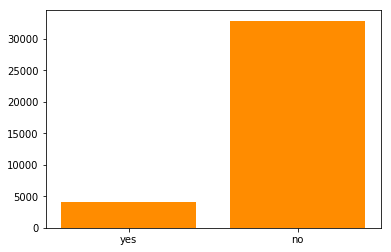

In [11]:
x = ('yes','no')
y = (data_yes.shape[0],data_no.shape[0])
plt.bar(x,y,color='darkorange')
plt.show()

显然，非订阅用户远多于订阅用户。

#### bank client data: 
1. age (numeric) 
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') 
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) 
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') 
5. default: has credit in default? (categorical: 'no','yes','unknown') 
6. housing: has home loan? (categorical: 'no','yes','unknown') 
7. loan: has personal loan? (categorical: 'no','yes','unknown')

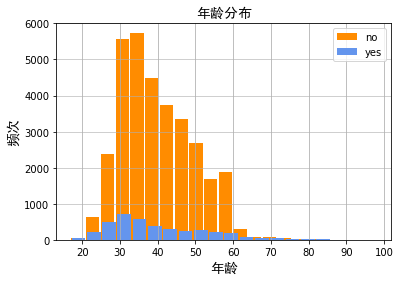

In [12]:
data_no['age'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='darkorange',label = 'no')
data_yes['age'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='cornflowerblue',label = 'yes')
plt.title(u'年龄分布',fontproperties=font)
plt.xlabel(u'年龄',fontproperties=font)
plt.ylabel(u'频次',fontproperties=font)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)

根据年龄的分布图可以了解到，数据中所包含的全部用户年龄分布较广，集中于30-60岁。其中珊瑚色代表没有订阅的群体，灰色代表订阅的群体，可以看到虽然珊瑚色代表的没有订阅的人数远大于深色代表的签约人数，但是分布还是与之前的情况类似，因此无法确定年龄带来的影响有多大。

#### related with the last contact of the current campaign: 
8. contact: contact communication type (categorical: 'cellular','telephone')  
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') 
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  

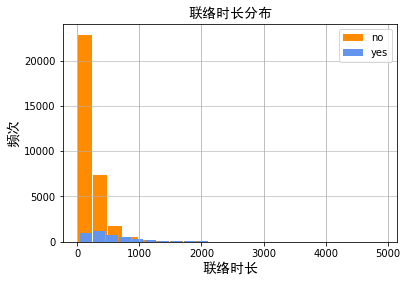

In [13]:
data_no['duration'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='darkorange',label = 'no')
data_yes['duration'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='cornflowerblue',label = 'yes')
plt.title(u'联络时长分布',fontproperties=font)
plt.xlabel(u'联络时长',fontproperties=font)
plt.ylabel(u'频次',fontproperties=font)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)

通话时长这个变量的分布较广，但是主要还是集中于1000以下的部分，显然当数据非常接近0的时候，用户拒绝订阅的程度是相当高的，因此可以得出结论，加强与客户的沟通可以有效提升用户订阅的可能性。

#### other attributes: 
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 
14. previous: number of contacts performed before this campaign and for this client (numeric) 
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

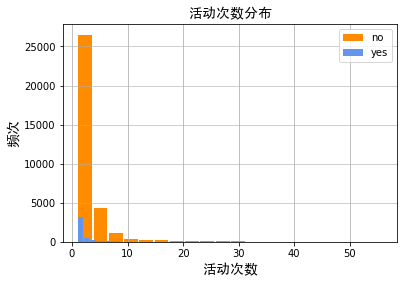

In [14]:
data_no['campaign'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='darkorange',label = 'no')
data_yes['campaign'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='cornflowerblue',label = 'yes')
plt.title(u'活动次数分布',fontproperties=font)
plt.xlabel(u'活动次数',fontproperties=font)
plt.ylabel(u'频次',fontproperties=font)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)

是否订阅情况下的活动次数分布类似，无法判断活动次数对于是否订阅的影响程度。

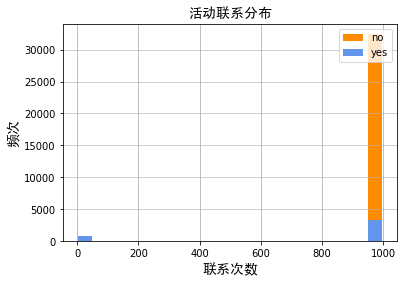

In [15]:
data_no['pdays'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='darkorange',label = 'no')
data_yes['pdays'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='cornflowerblue',label = 'yes')
plt.title(u'活动联系分布',fontproperties=font)
plt.xlabel(u'联系次数',fontproperties=font)
plt.ylabel(u'频次',fontproperties=font)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)

被联系过的客户全部都是订阅客户，因此建议加强与客户的联系，提升订阅量。

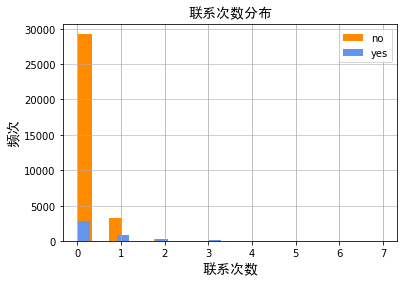

In [16]:
data_no['previous'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='darkorange',label = 'no')
data_yes['previous'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='cornflowerblue',label = 'yes')
plt.title(u'联系次数分布',fontproperties=font)
plt.xlabel(u'联系次数',fontproperties=font)
plt.ylabel(u'频次',fontproperties=font)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)

分布类似。

#### social and economic context attributes： 
16. emp.var.rate: employment variation rate. quarterly indicator (numeric) 
17. cons.price.idx: consumer price index. monthly indicator (numeric)  
18. cons.conf.idx: consumer confidence index. monthly indicator (numeric)  
19. euribor3m: euribor 3 month rate. daily indicator (numeric) 
20. nr.employed: number of employees. quarterly indicator (numeric)

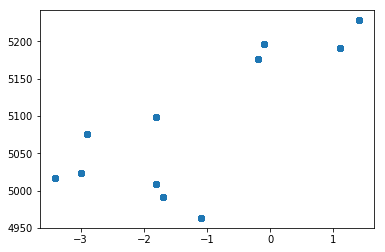

In [17]:
x = data['emp.var.rate']
y = data['nr.employed']
plt.scatter(x,y)
plt.show()

可以看出这两个变量存在一定的线性相关关系，可能会影响机器学习分析。

In [18]:
data['y'] = data['y'].apply(lambda x :1 if x=='yes' else 0)

In [19]:
data_heat = data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx',
                  'euribor3m','nr.employed','y']]

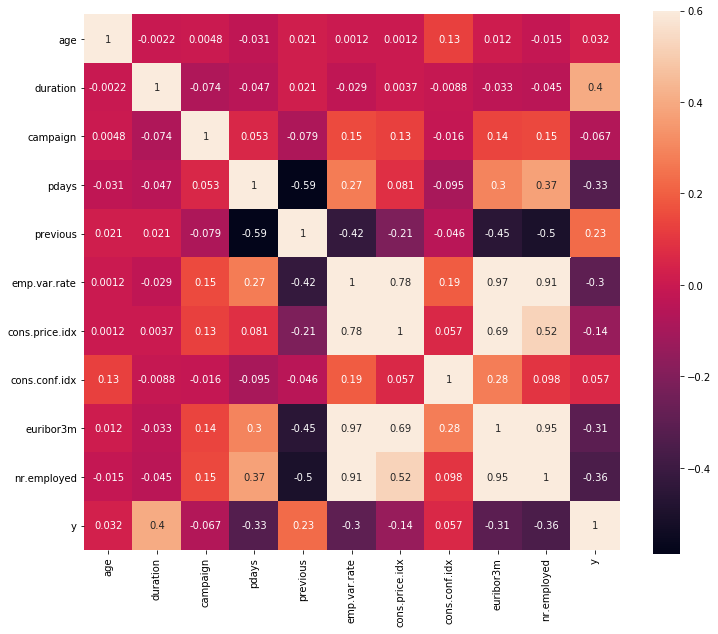

In [20]:
plt.figure(figsize=(12,10))
foo = sns.heatmap(data_heat.corr(), vmax=0.6, square=True, annot=True) 

通过相关系数热力图我们可以了解到，在几个数字型的变量中，duration与是否订阅的正相关度最高，nr.employed与是否订阅的负相关度最高。duration指上一次联系的持续时长，在描述中这个变量因为跟结果高度相关，因此要从预测模型中剔除。nr.employed指雇员人数，可以看到雇员人数越多，则该用户更倾向于不订阅。同时通过热力图我们了解到，数字变量中存在几个线性相关度比较高的变量，在后面的处理中需要注意。

# 机器学习

In [21]:
df = data.dropna(how = 'any')

In [22]:
df.nunique()

age                 75
job                 11
marital              3
education            7
default              2
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1416
campaign            40
pdays               26
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          313
nr.employed         11
y                    2
dtype: int64

## 保留所有列

In [23]:
data1 = pd.get_dummies(data)

In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 58 columns):
age                              37069 non-null int64
duration                         37069 non-null int64
campaign                         37069 non-null int64
pdays                            37069 non-null int64
previous                         37069 non-null int64
emp.var.rate                     37069 non-null float64
cons.price.idx                   37069 non-null float64
cons.conf.idx                    37069 non-null float64
euribor3m                        37069 non-null float64
nr.employed                      37069 non-null float64
y                                37069 non-null int64
job_admin.                       37069 non-null uint8
job_blue-collar                  37069 non-null uint8
job_entrepreneur                 37069 non-null uint8
job_housemaid                    37069 non-null uint8
job_management                   37069 non-null uint8
job_retired      

In [25]:
target = data1[['y']]
data2 = data1.drop(['y'],axis = 1)

## 特征选择

In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
gbdt = GradientBoostingClassifier(
    init=None,
    learning_rate=0.1,
    loss='deviance',
    max_depth=3,
    max_features=None,
    max_leaf_nodes=None,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    random_state=None,
    subsample=1.0,
    verbose=0,
    warm_start=False)
gbdt.fit(data2, target['y'])
 
 
score = gbdt.feature_importances_

In [28]:
score

array([4.94875834e-02, 2.96685688e-01, 1.64375690e-02, 2.77865658e-02,
       2.53722816e-02, 4.71375569e-02, 3.16903336e-02, 5.27112728e-02,
       1.72748840e-01, 5.30351724e-02, 0.00000000e+00, 3.81514232e-03,
       0.00000000e+00, 1.84712667e-03, 0.00000000e+00, 7.85740897e-04,
       1.61795460e-04, 4.89565143e-03, 0.00000000e+00, 3.45573299e-03,
       0.00000000e+00, 0.00000000e+00, 1.31899245e-03, 8.85191301e-03,
       1.93808536e-03, 0.00000000e+00, 0.00000000e+00, 7.24313517e-03,
       2.14927358e-03, 7.48877523e-03, 5.35801291e-03, 6.43036133e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.13946258e-03, 1.24849966e-02, 3.62633772e-02,
       2.51878331e-03, 1.91236298e-03, 1.35241961e-03, 4.80447634e-07,
       1.70931363e-02, 1.22958389e-02, 0.00000000e+00, 2.23926641e-02,
       0.00000000e+00, 1.82201058e-03, 6.62582454e-03, 2.52837778e-03,
       1.23015818e-02, 0.00000000e+00, 1.95925300e-02, 1.79526491e-03,
      

In [30]:
X_new = data2.loc[:, gbdt.feature_importances_>1]

In [ ]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data2, target['y'], test_size=0.4, random_state=0)

In [26]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data2, target['y'], test_size=0.4, random_state=0)

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
print("tree auc = ", metrics.auc(fpr, tpr))

tree auc =  0.7321249596730832


In [28]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=6)
kNN.fit(X_train, y_train) 
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, kNN.predict_proba(X_test)[:,1], pos_label=1)
print("kNN auc = ", metrics.auc(fpr1, tpr1))

kNN auc =  0.8832619770943112


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, y_train)
clf = clf.fit(X_train,y_train)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
print("tree auc = ", metrics.auc(fpr2, tpr2))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


tree auc =  0.937926815607413


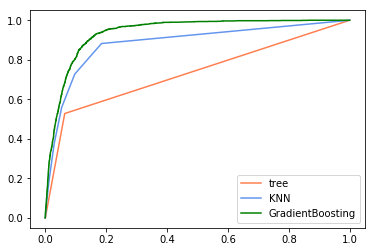

In [31]:
plt.plot(fpr, tpr, color="coral",label = 'tree')
plt.plot(fpr1, tpr1, color="cornflowerblue",label = 'KNN')
plt.plot(fpr2, tpr2, color="green",label = 'GradientBoosting')
plt.legend(loc='lower right')

这里我们看出梯度树提升模型的auc最接近1，且更靠近左上角，与横坐标圈出的面积大所以效果较好，准确率高。梯度树提升模型比较平滑，所以过拟合的程度较低。

## 去掉'duration'列

In [32]:
data3 = data2.drop(['duration'],axis = 1)

In [33]:
X_train1, X_test1, y_train1, y_test1 = cross_validation.train_test_split(data3, target['y'], test_size=0.4, random_state=0)

In [34]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train1,y_train1)
fpr, tpr, thresholds = metrics.roc_curve(y_test1, clf.predict_proba(X_test1)[:,1], pos_label=1)
print("tree auc = ", metrics.auc(fpr, tpr))

tree auc =  0.6288680682510664


In [35]:
kNN = KNeighborsClassifier(n_neighbors=6)
kNN.fit(X_train1, y_train1) 
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test1, kNN.predict_proba(X_test1)[:,1], pos_label=1)
print("kNN auc = ", metrics.auc(fpr1, tpr1))

kNN auc =  0.7405932313510413


In [36]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, y_train)
clf = clf.fit(X_train1,y_train1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test1, clf.predict_proba(X_test1)[:,1], pos_label=1)
print("tree auc = ", metrics.auc(fpr2, tpr2))

tree auc =  0.7876793203570276


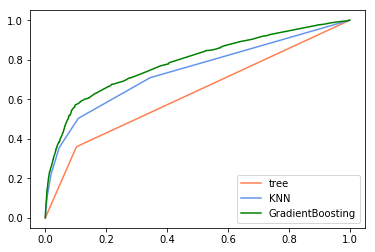

In [37]:
plt.plot(fpr, tpr, color="coral",label = 'tree')
plt.plot(fpr1, tpr1, color="cornflowerblue",label = 'KNN')
plt.plot(fpr2, tpr2, color="green",label = 'GradientBoosting')
plt.legend(loc='lower right')

当我们按照题目要求去掉duration列后发现，整体预测的精度下降了。在这样的情况下，梯度树提升模型表现得较好，更靠近左上方切曲线平滑，说明过拟合的情况较少。